# Dataset Description

Number of Instances: 305

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute):

1 = the patient survived 5 years or longer

2 = the patient died within 5 year

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

hebarman = pd.read_csv(r'C:\Users\DHEERAJ\Downloads\habarman.csv')

In [4]:
#No. of data point and features
print(hebarman.shape)
#There are 305 observation in dataset

(305, 4)


In [19]:
#adding columns names
hebarman.columns = ["age","year","axillary_node","survival_status"]
print(hebarman.columns)

Index(['age', 'year', 'axillary_node', 'survival_status'], dtype='object')


In [61]:
hebarman['survival_status'].value_counts()


1    224
2     81
Name: survival_status, dtype: int64

# Observation(s):

1) Number of observation : 305

2) The dataset is classified into two classes (Survived-1 and not survived-2)

3) 225 patients of class 1, the patient survived 5 years or longer 

4) 81 patients of class 2, the patient died within 5 year.

5) It is imbalance dataset as the number of element in both class are unequal

6) Number of Attribute is 4.


# 2-D Scatter plot

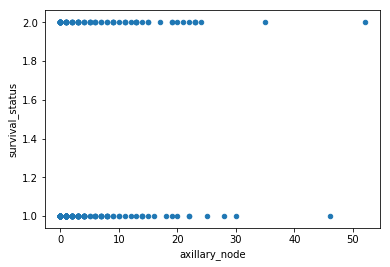

In [22]:
#Plotting plain scatter plot between axillary_node and survival
hebarman.plot(kind="scatter",x="axillary_node",y="survival_status")
plt.show()

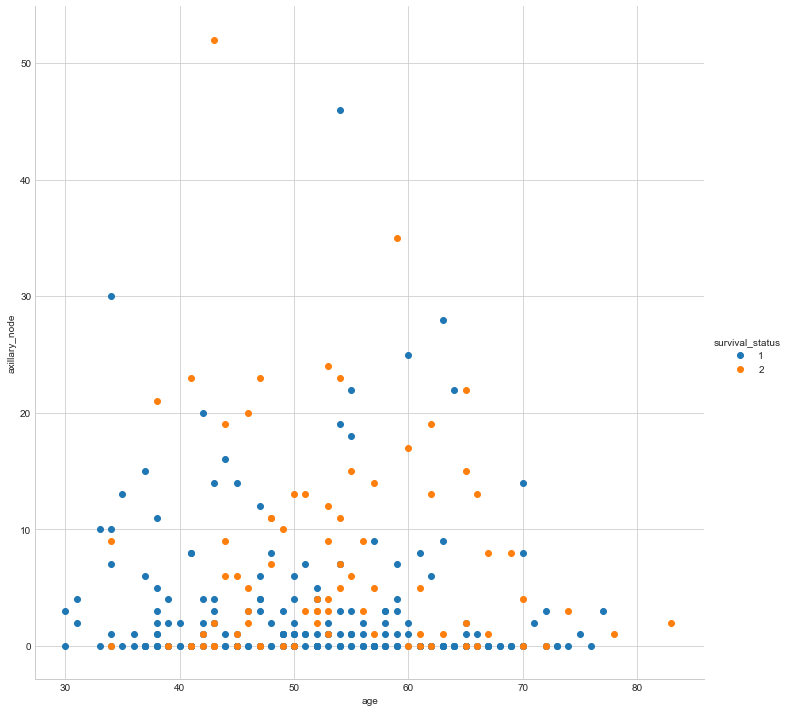

In [67]:
sns.set_style("whitegrid")
sns.FacetGrid(hebarman,hue='survival_status',size=10)\
.map(plt.scatter,"age","axillary_node")\
.add_legend()
plt.show()

# Observation:

1)  Most of the patient having Axillary_node less than 3

# Pair-Plot

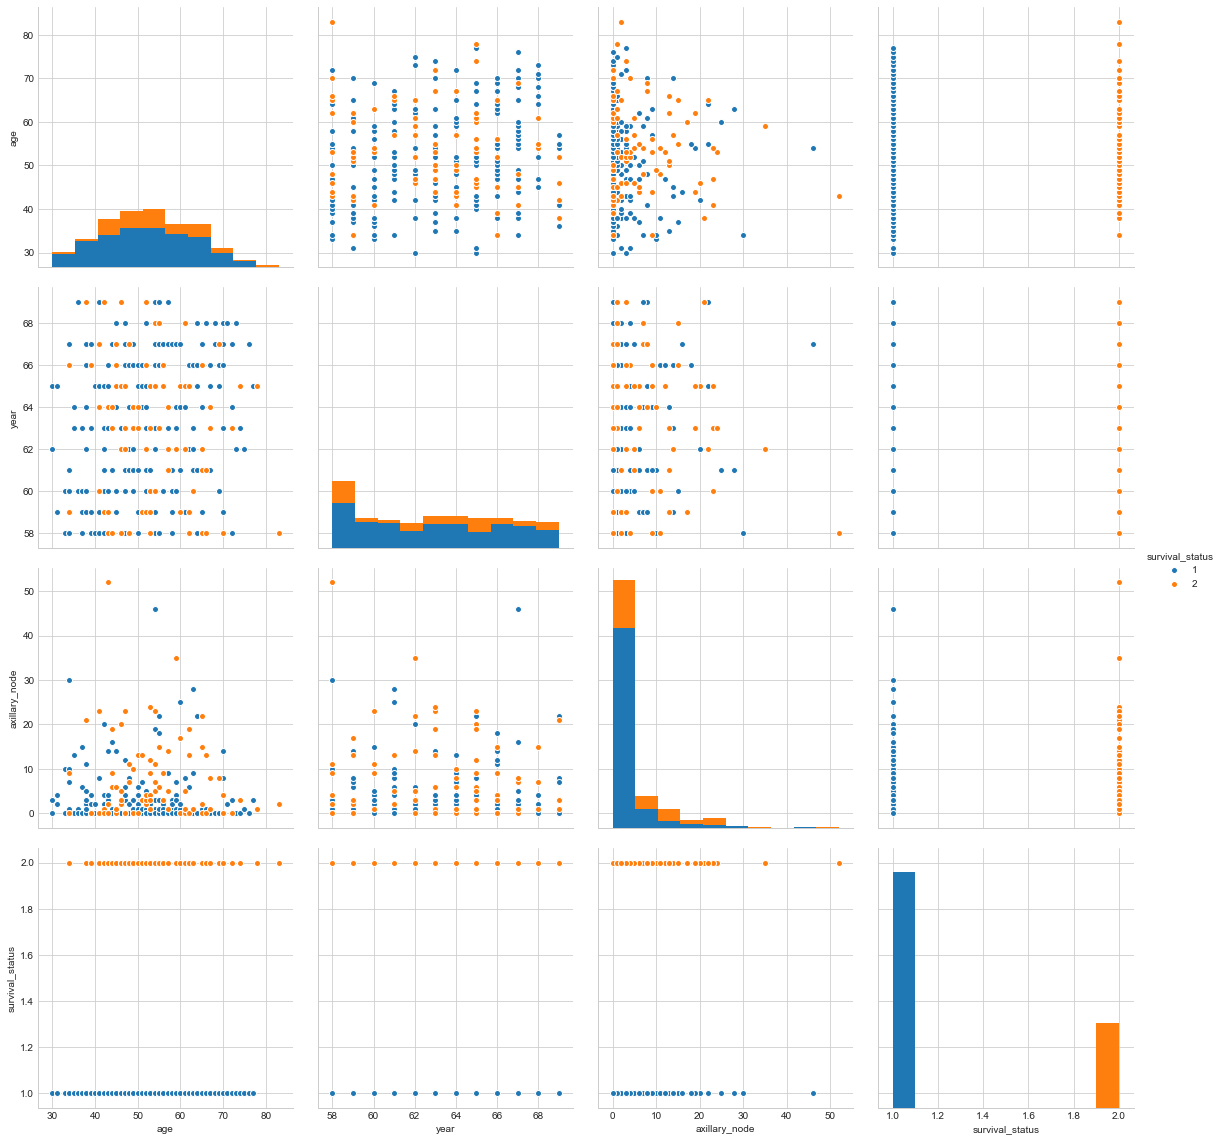

In [65]:
sns.set_style("whitegrid")
sns.pairplot(hebarman,hue='survival_status',size=4)
plt.show()

# Observation's:

1) There is a considerable overlap

2) Any Pair-Plot is not giving clear idea, They are not linearly separable.

# Histogram,PDF,CDF

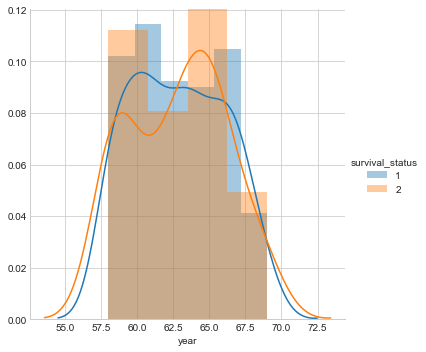

In [35]:
sns.FacetGrid(hebarman,hue='survival_status',size=5).map(sns.distplot,'year').add_legend()
plt.show()

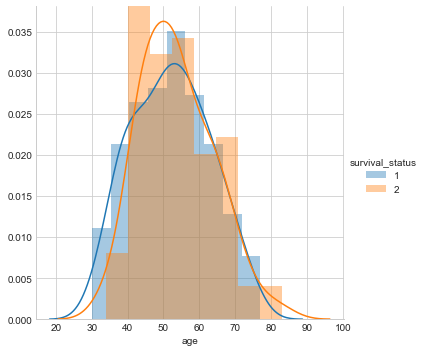

In [36]:
sns.FacetGrid(hebarman,hue='survival_status',size=5).map(sns.distplot,'age').add_legend()
plt.show()

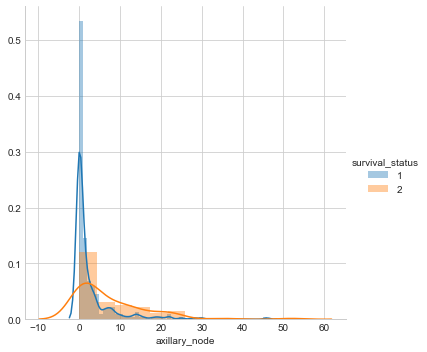

In [37]:
sns.FacetGrid(hebarman,hue='survival_status',size=5).map(sns.distplot,'axillary_node').add_legend()
plt.show()

# Observation's:

1)  The patient having axillary_node less than 2 have higher chance of survival.
  
2)  Age and Year are not good features for useful insights as the distibution is more similar for both people who survived and also dead.

In [38]:
survive = hebarman.loc[hebarman['survival_status']==1]
not_survive = hebarman.loc[hebarman['survival_status']==2]

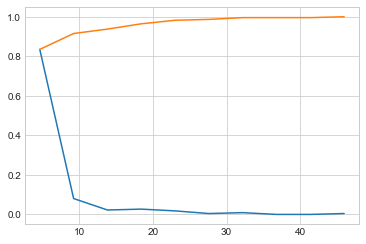

In [69]:
counts, bin_edges = np.histogram(survive['axillary_node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

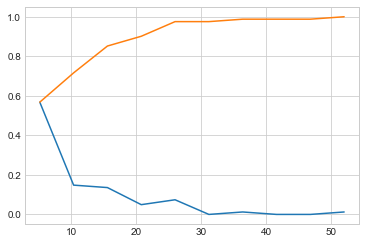

In [68]:
counts, bin_edges = np.histogram(not_survive['axillary_node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

# Observation:

1)  From both the cdf we can conclude that person having axillary_node 46 are not survived

In [53]:
print(survive.describe())

              age        year  axillary_node  survival_status
count  224.000000  224.000000     224.000000            224.0
mean    52.116071   62.857143       2.799107              1.0
std     10.937446    3.229231       5.882237              0.0
min     30.000000   58.000000       0.000000              1.0
25%     43.000000   60.000000       0.000000              1.0
50%     52.000000   63.000000       0.000000              1.0
75%     60.000000   66.000000       3.000000              1.0
max     77.000000   69.000000      46.000000              1.0


In [54]:
print(not_survive.describe())

             age       year  axillary_node  survival_status
count  81.000000  81.000000      81.000000             81.0
mean   53.679012  62.827160       7.456790              2.0
std    10.167137   3.342118       9.185654              0.0
min    34.000000  58.000000       0.000000              2.0
25%    46.000000  59.000000       1.000000              2.0
50%    53.000000  63.000000       4.000000              2.0
75%    61.000000  65.000000      11.000000              2.0
max    83.000000  69.000000      52.000000              2.0


# Observation's:

1)  In Both the table everything is almost same except the mean of axillary_node .

2)  Patient would most likely to survive if axillary_node is less than 3.

# Box Plot

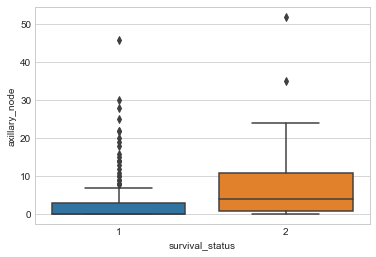

In [57]:
sns.boxplot(x='survival_status',y='axillary_node', data=hebarman)
plt.show()

# Observation:

1)  There are many black point above the whisker which is consider as outlier .

# Violin Plot

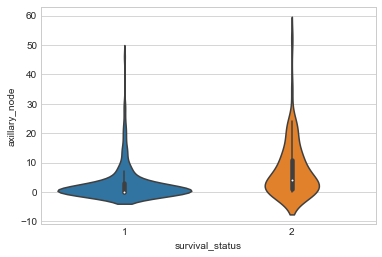

In [60]:
sns.violinplot(x='survival_status',y='axillary_node', data=hebarman)
plt.show()

# Observation:

1)  From this plot we conclude that the most patient who survived had axillary_node less than 2.